In [9]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/praveen/MSDS/MachineLearning/KaggleChallenges/Challenge2/Data'

In [10]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")

/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_2928/2922911961.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


In [11]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")
cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
train_num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm']
test_num_vars = [col for col in train_num_vars if col != "winner_ratio"]



/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_2928/1325753709.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


# Missing Values analysis:

In [12]:
# fake_missing_values = ['0', '0.0', 'Uncoded', 'None', '']
# for col in cat_vars:
#     col_values = train[col].astype(str)
#     value_counts = col_values[col_values.isin(fake_missing_values)].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Replacing total {value_counts.sum()} entries with 'Other_{col}'")
        
#         train.loc[col_values.isin(fake_missing_values), col] = f"Other_{col}"
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")


In [13]:
fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = train[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(train[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
train.drop(index=rows_to_drop, inplace=True)
train.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0      1468
→ Found 1468 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        4431
→ Found 4431 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 4447 rows from train DataFrame.


In [14]:
### Check fake missing values for test data

fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = test[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(test[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
test.drop(index=rows_to_drop, inplace=True)
test.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0       952
→ Found 952 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        2895
→ Found 2895 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 2910 rows from train DataFrame.


In [15]:
print(train.shape, test.shape)

(168401, 57) (112322, 58)


In [16]:
train[train_num_vars] = train[train_num_vars].apply(pd.to_numeric, errors='coerce')
test[test_num_vars] = test[test_num_vars].apply(pd.to_numeric, errors='coerce')

,governor_contribution_ratio,governor_contributions_sum_2010_usd,contribution_sum_2010_usd,house_and_assembly_contribution_ratio,house_and_assembly_contributions_sum_2010_usd,contribution_sum_2010_usd,senate_contribution_ratio,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_house_contribution_ratio,us_house_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contribution_ratio,us_senate_contributions_sum_2010_usd,contribution_sum_2010_usd
1435,0.139877,2284.93,16335.31,0.215339,3517.63,16335.31,0.644784,10532.75,16335.31,0.0,0.0,16335.31,0.0,0.00,16335.31
1436,0.000000,0.00,8065.60,0.000000,0.00,8065.60,0.000000,0.00,8065.60,1.0,8065.6,8065.60,0.0,0.00,8065.60
1437,0.000000,0.00,1497.66,0.000000,0.00,1497.66,0.000000,0.00,1497.66,0.0,0.0,1497.66,1.0,1497.66,1497.66


In [1086]:


# cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
# 'governor_contributions_sum_2010_usd',
# 'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
# 'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
# 'us_house_contribution_ratio','us_senate_contribution_ratio']

# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)
#     test[col] = test[col].clip(lower=0)

import numpy as np

# 1) Define your ratio definitions (old_name, numerator, denominator)
ratio_defs = [
    # count‑based
    ("candidacy_democratic_ratio",   "candidacy_democratic_count",            "candidacy_count"),
    ("candidacy_republican_ratio",   "candidacy_republican_count",            "candidacy_count"),
    ("contribution_democratic_count_ratio","contribution_democratic_count","contribution_count"),
    ("contribution_republican_count_ratio","contribution_republican_count","contribution_count"),
    ("politician_challenger_ratio",  "politician_challenger_count",           "politician_count"),
    ("politician_democratic_ratio",  "politician_democratic_count",           "politician_count"),
    ("politician_incumbency_ratio",  "politician_incumbency_count",           "politician_count"),
    ("politician_open_pos_ratio",    "politician_open_pos_count",             "politician_count"),
    ("politician_republican_ratio",  "politician_republican_count",           "politician_count"),
    # dollar‑sum based
    ("governor_contribution_ratio",  "governor_contributions_sum_2010_usd",   "contribution_sum_2010_usd"),
    ("house_and_assembly_contribution_ratio","house_and_assembly_contributions_sum_2010_usd","contribution_sum_2010_usd"),
    ("senate_contribution_ratio",    "senate_contributions_sum_2010_usd",      "contribution_sum_2010_usd"),
    ("us_house_contribution_ratio",  "us_house_contributions_sum_2010_usd",    "contribution_sum_2010_usd"),
    ("us_senate_contribution_ratio", "us_senate_contributions_sum_2010_usd",   "contribution_sum_2010_usd"),
]

# 2) (Optional) Save the originals to compare later
orig_train = train[[old for old,_,_ in ratio_defs]].copy()
orig_test = test[[old for old,_,_ in ratio_defs]].copy()

# 3) Overwrite each ratio directly, safely
for oldcol, num, den in ratio_defs:
    train[oldcol] = (
        train[num]
            .div(train[den].replace({0: np.nan}))  # 0→NaN
            .fillna(0)                             # NaN→0
            .clip(0, 1)                            # clamp into [0,1]
    )
    test[oldcol] = (
        test[num]
            .div(test[den].replace({0: np.nan}))  # 0→NaN
            .fillna(0)                             # NaN→0
            .clip(0, 1)                            # clamp into [0,1]
    )


# 4) Print average absolute differences vs. originals
print("Average absolute difference between original and recomputed ratios for train and test data:")
for oldcol, _, _ in ratio_defs:
    if oldcol in orig_train:
        delta_train = (train[oldcol] - orig_train[oldcol]).abs().mean()
        delta_test = (test[oldcol] - orig_test[oldcol]).abs().mean()
        print(f"  {oldcol:40s} {delta_train:.5f}")
        print(f"  {oldcol:40s} {delta_test:.5f}")
        
    else:
        print(f"  {oldcol:40s} (original not present)")

# 5) Sanity‑check
assert np.isfinite(train[[old for old,_,_ in ratio_defs]]).all().all(), "Still found infinities!"
assert np.isfinite(test[[old for old,_,_ in ratio_defs]]).all().all(), "Still found infinities!"

assert ((train[[old for old,_,_ in ratio_defs]] >= 0) & (train[[old for old,_,_ in ratio_defs]] <= 1)).all().all(), "Ratios out of [0,1]!"
assert ((test[[old for old,_,_ in ratio_defs]] >= 0) & (test[[old for old,_,_ in ratio_defs]] <= 1)).all().all(), "Ratios out of [0,1]!"


print("✅ All ratios safely overwritten in place and checked.")


# 1. Check how many duplicate rows exist
num_duplicates_train = train.duplicated().sum()
num_duplicates_test = train.duplicated().sum()

print(f"🔍 Number of duplicate rows in train: {num_duplicates_train}")
print(f"🔍 Number of duplicate rows in test: {num_duplicates_test}")

# 2. Drop duplicate records
train = train.drop_duplicates()
test = test.drop_duplicates()

print(f"✅ Duplicates removed for train. New shape: {train.shape}")
print(f"✅ Duplicates removed for test. New shape: {test.shape}")


import numpy as np
import pandas as pd
from category_encoders import TargetEncoder

# ------------------------------------------------------------------
# 1.  PARAMETERS
# ------------------------------------------------------------------
TOP_GENERAL   = 25
TOP_SPECIFIC  = 100
STATE_MIN     = 200          # states with <200 rows → OTHER
TE_SMOOTHING  = 10           # strength of shrinkage in TargetEncoder

cat_top_lump  = {
    "general_sector"  : (TOP_GENERAL,  "Other_Sector"),
    "specific_sector" : (TOP_SPECIFIC, "Other_Specific"),
}

# ------------------------------------------------------------------
# 2.  HELPER FUNCTIONS
# ------------------------------------------------------------------
def lump_by_top(df, col, top_n, new_label):
    top_vals = df[col].value_counts().nlargest(top_n).index
    df[col]  = df[col].where(df[col].isin(top_vals), new_label)
    return df

def lump_by_min(df, col, min_cnt, new_label):
    small = df[col].value_counts()[lambda s: s < min_cnt].index
    df[col] = df[col].where(~df[col].isin(small), new_label)
    return df

# ------------------------------------------------------------------
# 3.  APPLY LUMPING (***train and test***)
# ------------------------------------------------------------------
for col, (top_n, label) in cat_top_lump.items():
    train = lump_by_top(train, col, top_n, label)
    test  = lump_by_top(test,  col, top_n, label)   # ★ keep mapping identical

train = lump_by_min(train, "state", STATE_MIN, "OTHER")
test  = lump_by_min(test,  "state", STATE_MIN, "OTHER")

Average absolute difference between original and recomputed ratios for train and test data:
  candidacy_democratic_ratio               0.00000
  candidacy_democratic_ratio               0.00000
  candidacy_republican_ratio               0.00000
  candidacy_republican_ratio               0.00000
  contribution_democratic_count_ratio      0.00000
  contribution_democratic_count_ratio      0.00000
  contribution_republican_count_ratio      0.00000
  contribution_republican_count_ratio      0.00000
  politician_challenger_ratio              0.00000
  politician_challenger_ratio              0.00000
  politician_democratic_ratio              0.00000
  politician_democratic_ratio              0.00000
  politician_incumbency_ratio              0.00000
  politician_incumbency_ratio              0.00000
  politician_open_pos_ratio                0.00000
  politician_open_pos_ratio                0.00000
  politician_republican_ratio              0.00000
  politician_republican_ratio            

# Check association between categorical variables and target variable

In [1087]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Ensure winner_ratio is numeric
train["winner_ratio"] = pd.to_numeric(train["winner_ratio"], errors="coerce")

results = []

for col in cat_vars:
    unique_vals = train[col].nunique()
    
    if unique_vals < 2:
        print(f"⚠️ Skipping '{col}' — only one category")
        continue

    print(f"\n📊 Analyzing '{col}' with {unique_vals} categories:")

    # Drop rows with missing or bad values in current column
    df = train[[col, "winner_ratio"]].dropna()
    
    # Binary case: t-test
    if unique_vals == 2:
        groups = list(df[col].unique())
        g1 = df[df[col] == groups[0]]["winner_ratio"]
        g2 = df[df[col] == groups[1]]["winner_ratio"]
        stat, pval = ttest_ind(g1, g2, equal_var=False)
        test_type = "t-test"
    else:
        # Multi-category case: ANOVA
        group_list = [group["winner_ratio"].values for _, group in df.groupby(col)]
        stat, pval = f_oneway(*group_list)
        test_type = "ANOVA"

    print(f"🧪 {test_type} → F/t-stat = {stat:.4f}, p-value = {pval:.4e}")
    results.append({"column": col, "test": test_type, "stat": stat, "p_value": pval})

# Convert to DataFrame for sorting or exporting
test_results = pd.DataFrame(results).sort_values("p_value")

print("\n✅ Summary of most statistically associated categorical variables:")
print(test_results.head(10))



📊 Analyzing 'general_sector' with 26 categories:
🧪 ANOVA → F/t-stat = 82.9190, p-value = 0.0000e+00

📊 Analyzing 'city' with 8778 categories:
🧪 ANOVA → F/t-stat = 1.6997, p-value = 2.6085e-301

📊 Analyzing 'zip_code' with 15454 categories:
🧪 ANOVA → F/t-stat = 1.5332, p-value = 5.5763e-315

📊 Analyzing 'specific_sector' with 101 categories:
🧪 ANOVA → F/t-stat = 28.8799, p-value = 0.0000e+00

📊 Analyzing 'state' with 32 categories:
🧪 ANOVA → F/t-stat = 117.5385, p-value = 0.0000e+00

📊 Analyzing 'contributor_type' with 3 categories:
🧪 ANOVA → F/t-stat = 1059.5341, p-value = 0.0000e+00

✅ Summary of most statistically associated categorical variables:
             column   test         stat        p_value
0    general_sector  ANOVA    82.918987   0.000000e+00
3   specific_sector  ANOVA    28.879880   0.000000e+00
4             state  ANOVA   117.538467   0.000000e+00
5  contributor_type  ANOVA  1059.534055   0.000000e+00
2          zip_code  ANOVA     1.533192  5.576328e-315
1          

### Dropping zip_code and city columns, since they're found to be least significant and with high cardinallity

In [1088]:
train.drop(["city", "zip_code"], axis=1, inplace= True)
test.drop(["city", "zip_code"], axis=1, inplace= True)

In [ ]:
train.general_sector.value_counts().to_clipboard()

In [1089]:


# ------------------------------------------------------------------
# 4.  TARGET ENCODING  (***fit on train, transform test***)
# ------------------------------------------------------------------
te_cols = ["general_sector", "specific_sector", "state"]
te      = TargetEncoder(cols=te_cols, smoothing=TE_SMOOTHING)

train[te_cols] = te.fit_transform(train[te_cols], train["winner_ratio"])
test[te_cols]  = te.transform(test[te_cols])            # ★ no fit here


# ------------------------------------------------------------------
# 6.  HANDLE THE REMAINING SMALL CATEGORICALS WITH ONE‑HOT
# ------------------------------------------------------------------
cat_small = ["contributor_type"]      # only 3 levels
train = pd.get_dummies(train, columns=cat_small, drop_first=True)
test  = pd.get_dummies(test,  columns=cat_small, drop_first=True)

# Keep column order identical in train & test after one‑hot:
missing_cols = [c for c in train.columns if c not in test.columns]
for c in missing_cols:
    print(f'{c} column is missing in test data')
    test[c] = 0
test = test[train.columns.drop("winner_ratio")]         # align

print("✅  Pre‑processing finished. Shapes:", train.shape)
print("✅  Pre‑processing finished. Shapes:",   test.shape)
   
for col in ["city", "zip_code"]:
    if col in cat_vars:
        cat_vars.remove(col)


✅  Pre‑processing finished. Shapes: (166229, 56)
✅  Pre‑processing finished. Shapes: (112322, 55)


## Drop redundant columns

In [1090]:
# 1) Define the ratios you want to keep
ratio_cols = [
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'politician_democratic_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'politician_incumbency_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    'governor_contribution_ratio'
]

# 2) List all “base” columns to drop
drop_cols = [
    # candidacy counts
    'candidacy_count',
    'candidacy_democratic_count',
    'candidacy_republican_count',

    # politician counts
    'politician_count',
    'politician_democratic_count',
    'politician_republican_count',
    'politician_challenger_count',
    'politician_open_pos_count',
    'politician_incumbency_count',

    # contribution counts
    'contribution_count',
    'contribution_democratic_count',
    'contribution_republican_count',

    # money sums
    'contribution_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
]

# 3) Keep your target, label/index, any categoricals you still need, plus the ratios
keep_cols = ratio_cols + [
    'winner_ratio',   # target
    'train_label',
    'index',
] + cat_vars       # your list of categorical variables

# 4) Compute final drop list = everything not in keep_cols
all_cols = train.columns.tolist()
to_drop = [c for c in all_cols if c in drop_cols]

print("→ Dropping these base columns:\n", to_drop)

# 5) Create the reduced DataFrame
train_reduced = train.drop(columns=to_drop)
train.drop(columns=to_drop, inplace= True)
print("\nRemaining columns:")
print(train.columns.tolist())


→ Dropping these base columns:
 ['candidacy_count', 'candidacy_democratic_count', 'candidacy_republican_count', 'contribution_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'contribution_sum_2010_usd', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd']

Remaining columns:
['general_sector', 'specific_sector', 'state', 'winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenge

In [1091]:
## Remove those columns from list
train_num_vars = [col for col in train_num_vars if col not in drop_cols]
test_num_vars = [col for col in test_num_vars if col not in drop_cols]


## Check distribution of the different features

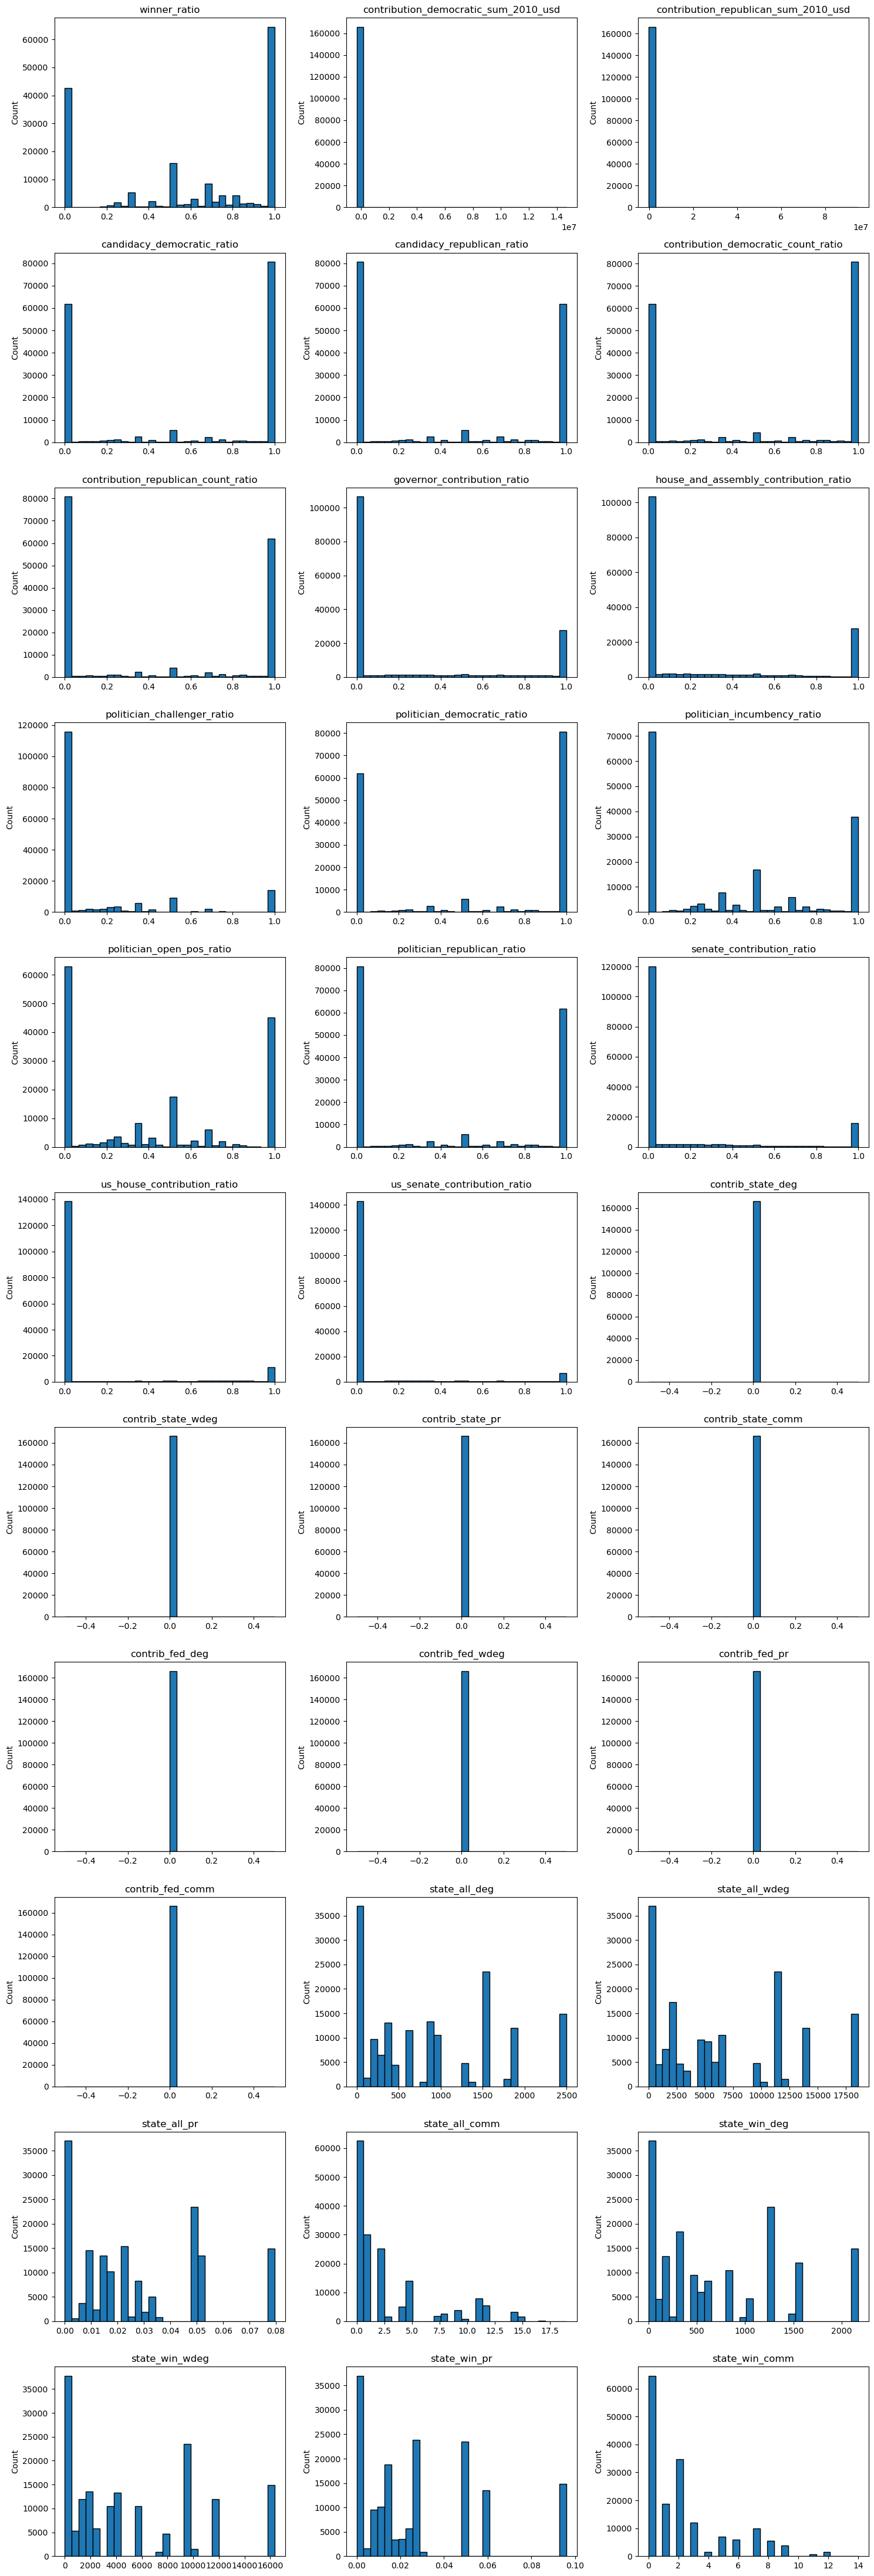

In [1092]:
import matplotlib.pyplot as plt

def plot_histograms(df, train_num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(train_num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, train_num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(train, train_num_vars)


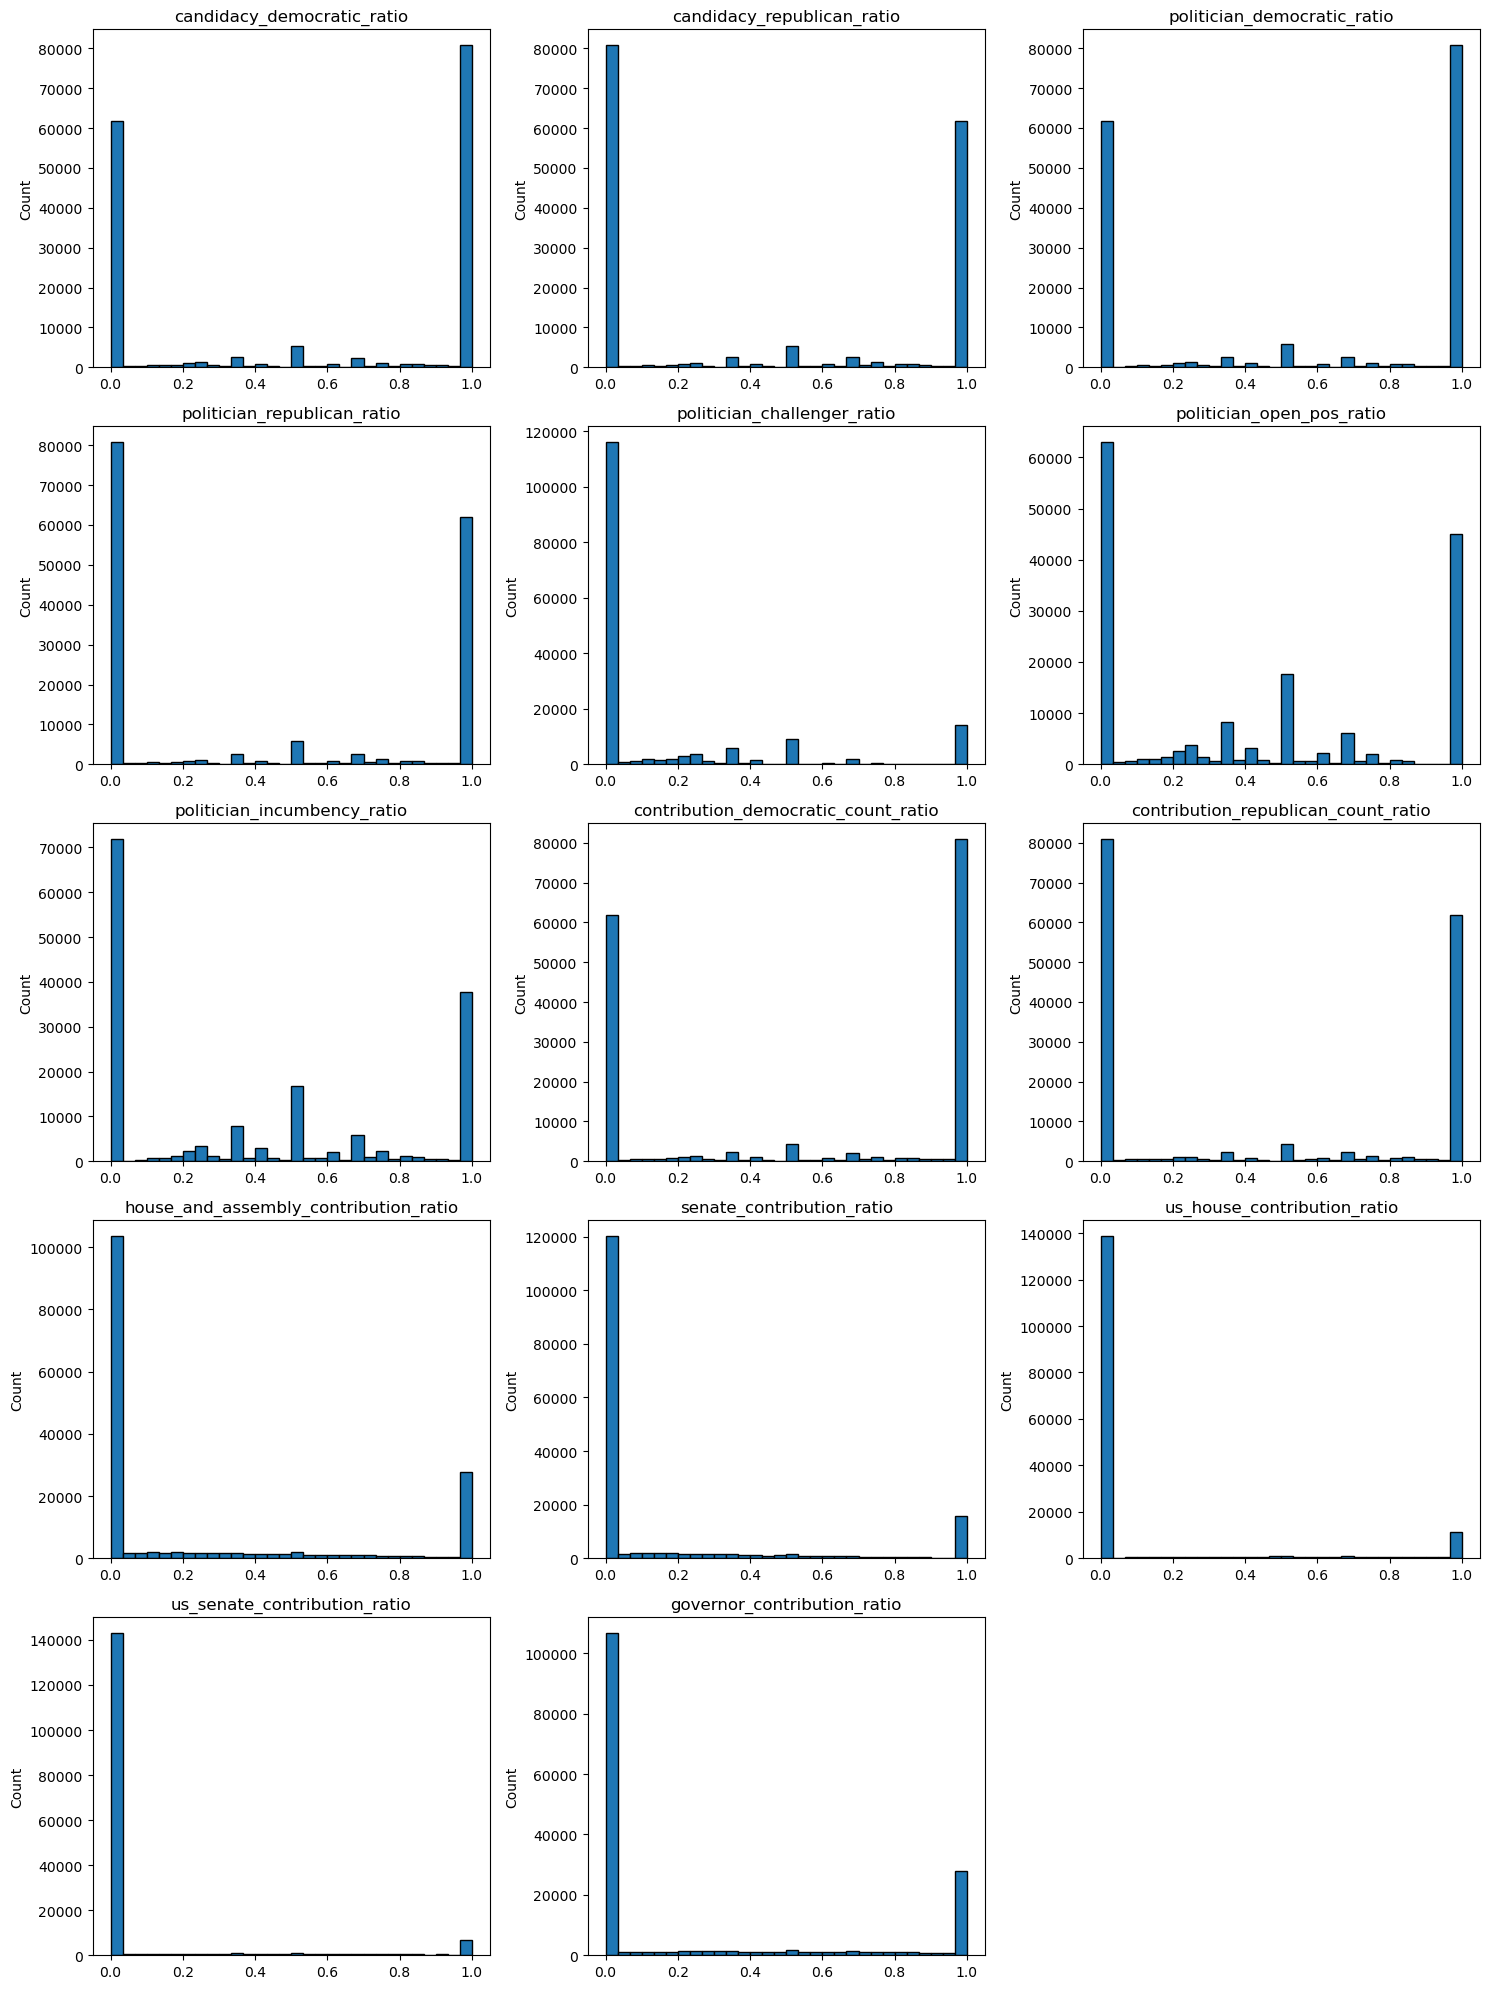

In [1093]:

plot_histograms(train, ratio_cols)


## Treat ratio columns to fix skewness or zero and 1 inflated data

In [1094]:
train.columns

Index(['general_sector', 'specific_sector', 'state', 'winner_ratio',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm'

In [1095]:
import numpy as np
import pandas as pd


THRESH = 0.10
target = "winner_ratio"
# ── 1) Correlation on raw ratios ───────────────────────────────────────
corr_df = train[ratio_cols + [target]].corr(method='spearman')
spearman = corr_df[target].abs().drop(target)

# pick those above threshold
selected_raw = spearman[spearman > THRESH].index.tolist()
print("Keeping these ratio_cols (|ρ| > 0.10):", selected_raw)

# ── 2) Engineer flags/logits only for selected ratios ──────────────────
EPS = 1e-4
def engineer_selected(df, selected):
    out = df.copy()
    for col in selected:
        out[f"{col}_is_zero"] = (out[col] <= 0).astype('int8')
        out[f"{col}_is_one"]  = (out[col] >= 1).astype('int8')
        # logit for all linear/tree/nn — adjust if you want only some
        clip = out[col].clip(EPS, 1-EPS)
        out[f"{col}_logit"] = np.log(clip / (1-clip))
    # drop **all** raw ratio columns
    out.drop(columns=ratio_cols, inplace=True)
    return out

linear_df = engineer_selected(train, selected_raw)

selected_spearman = spearman[ spearman.abs() > THRESH ]\
                         .sort_values(ascending=False)

print("Selected ratio_cols with |Spearman ρ| >", THRESH)
print(selected_spearman.to_frame(name='spearman_rho'))


# ── 3) Drop any engineered columns from the unselected ratios ─────────
#    (shouldn’t be any, because engineer_selected only touches `selected_raw`)
#    but if you re‑ran on full set, you could do:
to_drop = []
for col in ratio_cols:
    if col not in selected_raw:
        to_drop += [c for c in linear_df.columns if c.startswith(col)]
linear_df.drop(columns=to_drop, inplace=True)




# ── 4) Now linear_df contains:
#    • flags and logits for only your important ratios
#    • all other original columns (categoricals + other numerics)

print(" \n\n","Final columns after ratio selection:")
print(linear_df.columns.tolist())



Keeping these ratio_cols (|ρ| > 0.10): ['politician_challenger_ratio', 'politician_open_pos_ratio', 'politician_incumbency_ratio', 'governor_contribution_ratio']
Selected ratio_cols with |Spearman ρ| > 0.1
                             spearman_rho
politician_incumbency_ratio      0.488075
politician_challenger_ratio      0.319811
politician_open_pos_ratio        0.254731
governor_contribution_ratio      0.137076
 

 Final columns after ratio selection:
['general_sector', 'specific_sector', 'state', 'winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm', 'contributor_type_Non-Individual', 'contributor_type_Other', 'politician_challenger_ratio_is_zero', 

In [1096]:
## Remove those columns from list
selected_ratio_cols = selected_spearman.index.tolist()

# 3) Compute which ratios to discard
discarded_ratio_cols = [c for c in ratio_cols if c not in selected_ratio_cols]
print("Discarding these ratio columns from train_num_vars:", discarded_ratio_cols)

# 4) Filter train_num_vars
train_num_vars = [c for c in train_num_vars if c not in discarded_ratio_cols]
test_num_vars = [col for col in test_num_vars if col not in discarded_ratio_cols]



Discarding these ratio columns from train_num_vars: ['candidacy_democratic_ratio', 'candidacy_republican_ratio', 'politician_democratic_ratio', 'politician_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']


In [1097]:
train.columns

Index(['general_sector', 'specific_sector', 'state', 'winner_ratio',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm'

In [1098]:
import numpy as np

# 2) Explicit list of network metrics
nw_vars = [
    'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
    'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
    'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 
    'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm'
]
cat_vars = ['general_sector', 'specific_sector', 'state','contributor_type_Non-Individual','contributor_type_Other']

# 3) Capture any one‑hot dummies for your raw cats
encoded_cat_cols = [
    col for col in linear_df.columns
    if any(col.startswith(f"{cat}_") for cat in cat_vars)
]

# 4) Full cat list = raw + their encoded variants
all_cat_cols = cat_vars + encoded_cat_cols

# 5) Binary flags
binar_flags = [
    col for col in linear_df.columns
    if col.endswith('_is_zero') or col.endswith('_is_one')
]

# 6) Now compute train_num_vars = all numeric columns
#    minus flags, minus categories, minus network metrics, minus target
train_num_vars = [
    col for col in linear_df.select_dtypes(include=[np.number]).columns
    if col not in binar_flags
       and col not in all_cat_cols
       and col not in nw_vars
       and col != 'winner_ratio'
]

test_num_vars = [
    col for col in linear_df.select_dtypes(include=[np.number]).columns
    if col not in binar_flags
       and col not in all_cat_cols
       and col not in nw_vars
       and col != 'winner_ratio'
]

# 7) Let’s see what we’ve got
print("Binary flags (binar_flags):")
print(binar_flags, "\n")

print("Network metrics (nw_vars):")
print(nw_vars, "\n")

print("Continuous numeric features (train_num_vars):")
print(train_num_vars, "\n")

print("Categorical cols (all_cat_cols):")
print(all_cat_cols)



Binary flags (binar_flags):
['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one'] 

Network metrics (nw_vars):
['state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm'] 

Continuous numeric features (train_num_vars):
['contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit'] 

Categorical cols (all_cat_cols):
['general_sector', 'specifi

In [1099]:
cat_vars

['general_sector',
 'specific_sector',
 'state',
 'contributor_type_Non-Individual',
 'contributor_type_Other']

In [1100]:
# 1) If you really want to drop 'contributor_type' from your cat‐list:
# cat_vars.remove('contributor_type')

# 2) Create the new total‐sum column in linear_df:
linear_df['contribution_total_sum'] = linear_df['contribution_democratic_sum_2010_usd']+ linear_df['contribution_republican_sum_2010_usd']

# 3) Drop the old two‐column sum, both from the DF and from your numeric‐vars list:
contribution_sum = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd']
linear_df.drop(columns=contribution_sum, inplace=True)

for c in contribution_sum:
    if c in train_num_vars:
        train_num_vars.remove(c)

# 4) Now register the new column _before_ building your all_vars list:
if 'contribution_total_sum' not in train_num_vars:
    train_num_vars.append('contribution_total_sum')

# 5) Now combine everything into one big list of columns to keep:
all_vars = train_num_vars + cat_vars + nw_vars + binar_flags + [target]

# 6) Subset the DataFrame:
train = linear_df[all_vars].copy()


In [1101]:
train.columns

Index(['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_logit', 'contribution_total_sum',
       'general_sector', 'specific_sector', 'state',
       'contributor_type_Non-Individual', 'contributor_type_Other',
       'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
       'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
       'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr',
       'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg',
       'contrib_fed_pr', 'contrib_fed_comm',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one'

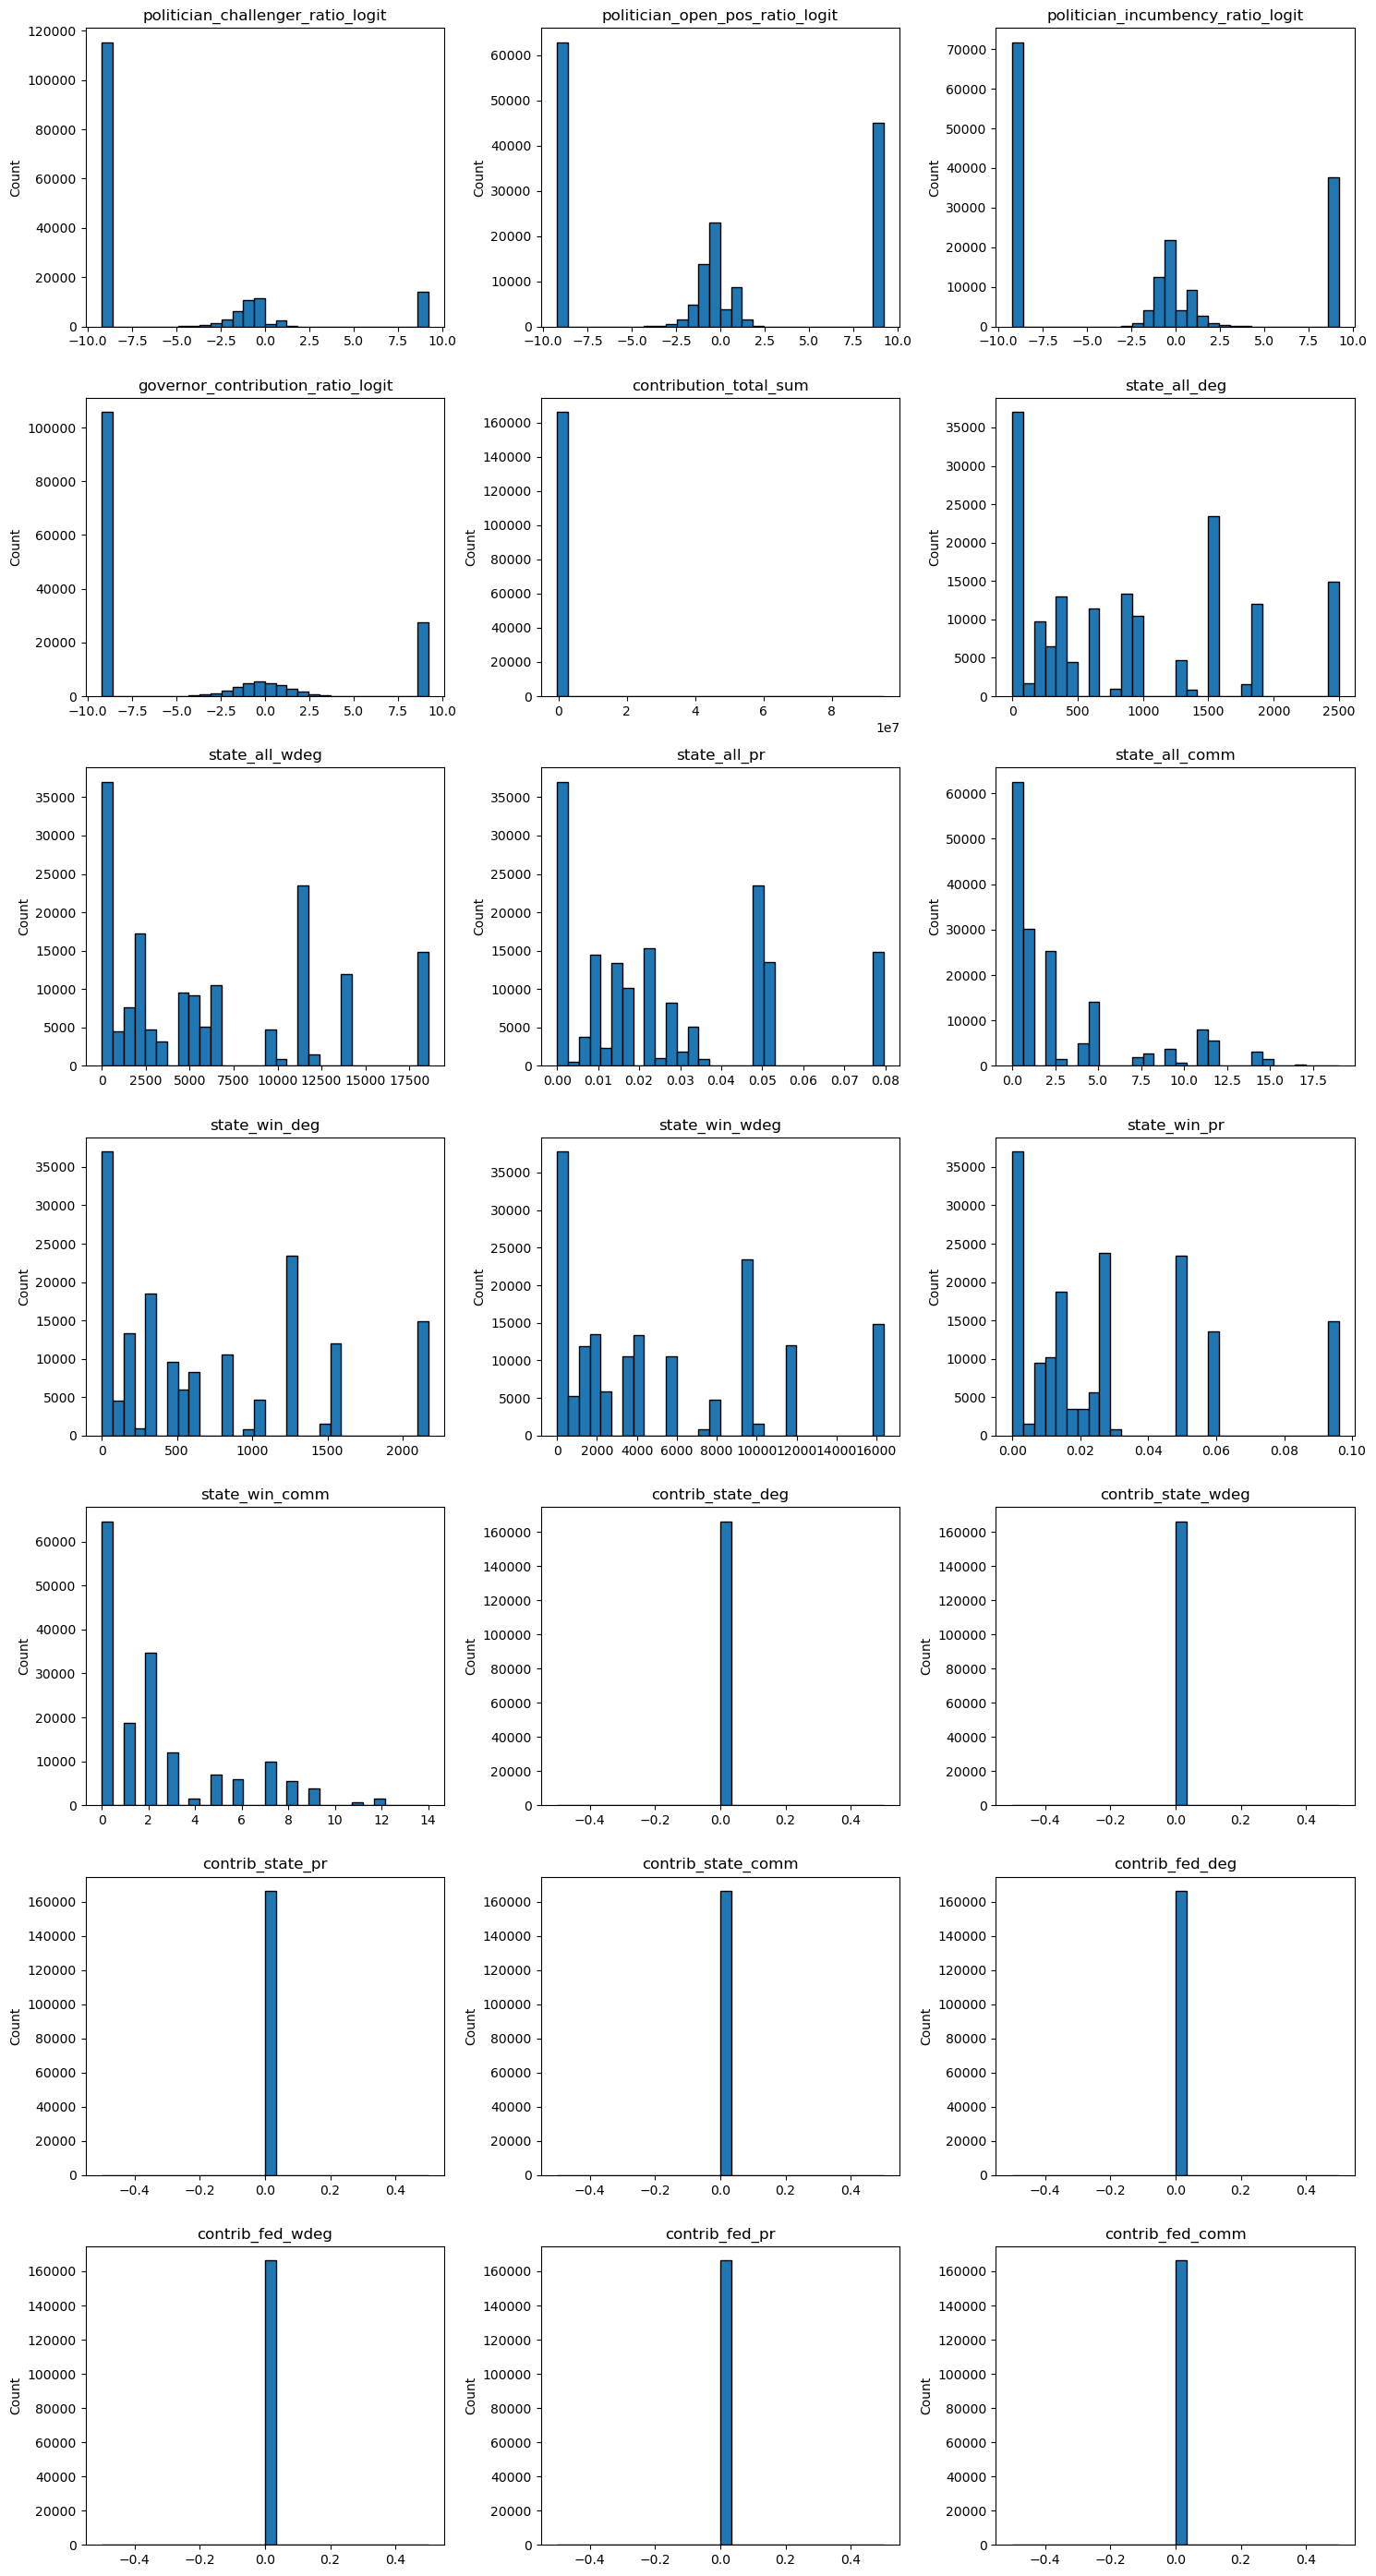

In [1102]:
plot_histograms(train, train_num_vars + nw_vars)

## Check skewness in features

In [1103]:
train_bkp = train.copy()

Pre‑log1p skewness:
  contribution_total_sum  254.885
  state_all_deg          0.604
  state_all_wdeg         0.669
  state_all_pr           0.742
  state_all_comm         1.542
  state_win_deg          0.769
  state_win_wdeg         0.798
  state_win_pr           1.064
  state_win_comm         1.348

→ Applying log1p to: ['contribution_total_sum', 'state_all_comm', 'state_win_pr', 'state_win_comm']

Post‑log1p skewness:
  contribution_total_sum   0.180
  state_all_comm         0.574
  state_win_pr           1.017
  state_win_comm         0.357

Final train_num_vars: ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit', 'contribution_total_sum']


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


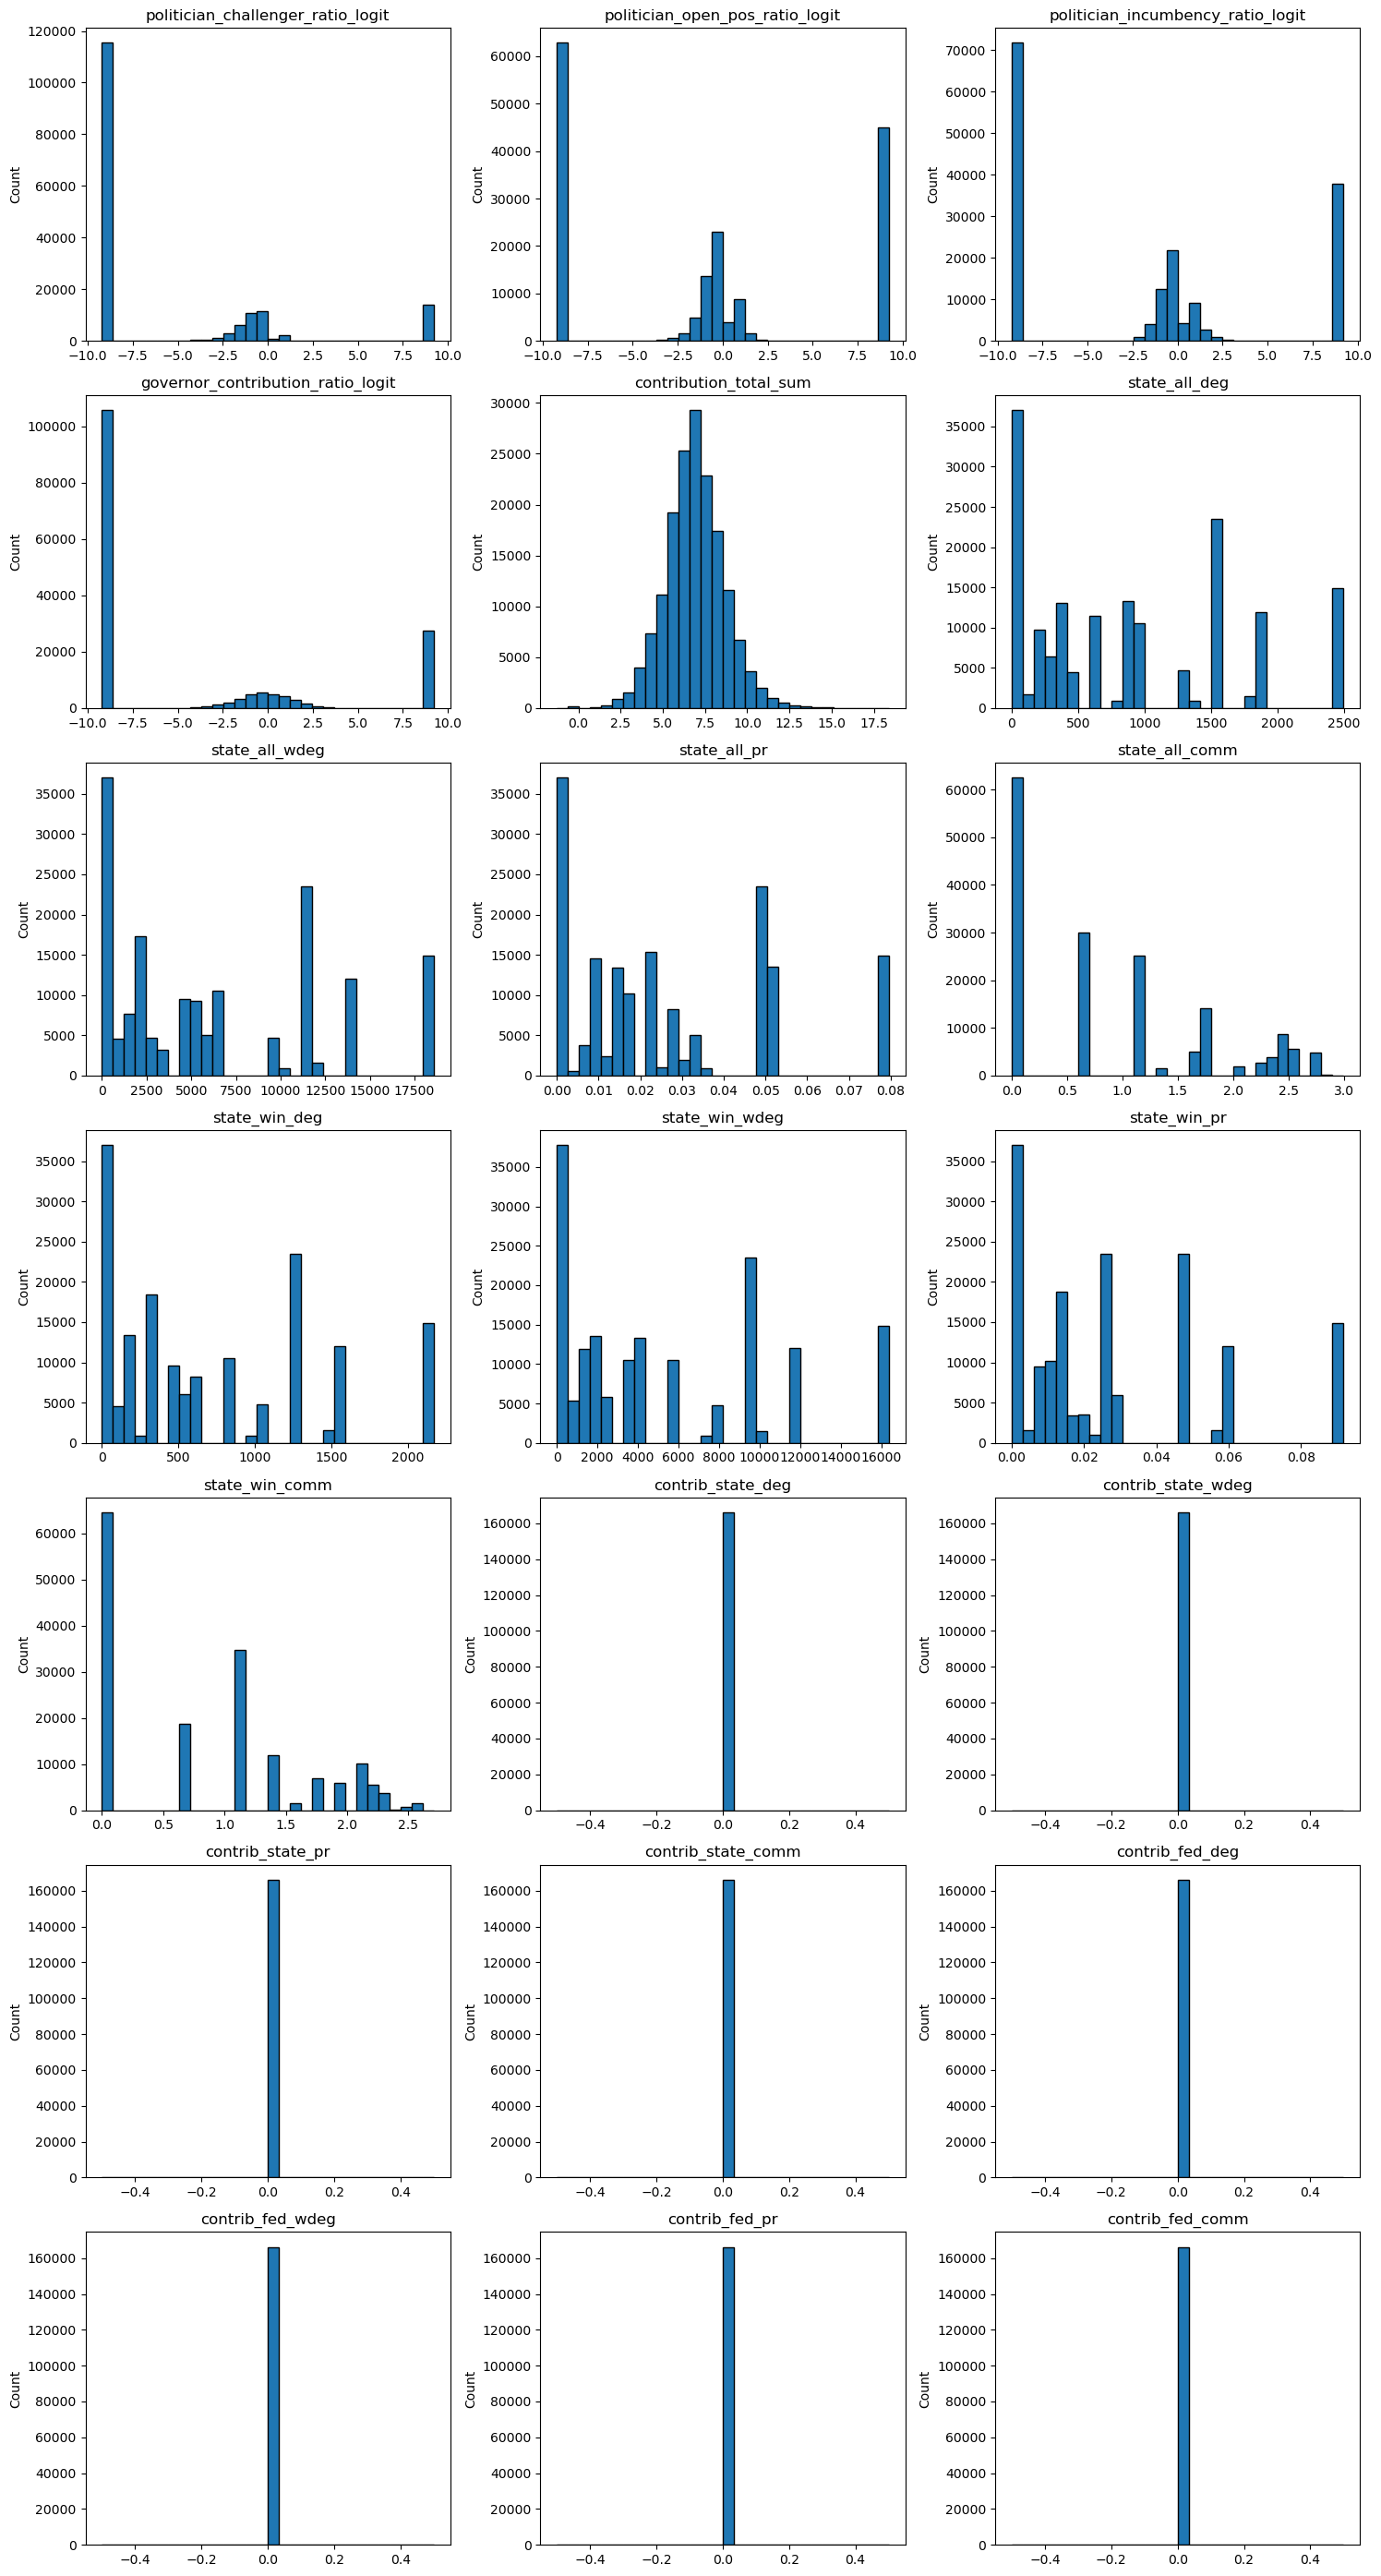

In [1104]:
import numpy as np
from scipy.stats import skew

# 1) List all nonnegative columns you’d like to check
to_check = [
    'contribution_total_sum',
    'state_all_deg','state_all_wdeg','state_all_pr','state_all_comm',
    'state_win_deg','state_win_wdeg','state_win_pr','state_win_comm'
]

# to_check = train_num_vars+ nw_vars

# 2) Compute & print pre‑log1p skewness
print("Pre‑log1p skewness:")
pre = {c: skew(train[c].dropna()) for c in to_check}
for c,v in pre.items():
    print(f"  {c:20s}  {v:6.3f}")

# 3) Automatically pick those with |skew| > 1.0
to_log = [c for c,v in pre.items() if abs(v) > 1.0]
print("\n→ Applying log1p to:", to_log)

# 4) Apply the transformation in place
for c in to_log:
    train[c] = np.log1p(train[c])

# 5) Print post‑log1p skewness
print("\nPost‑log1p skewness:")
post = {c: skew(train[c].dropna()) for c in to_log}
for c,v in post.items():
    print(f"  {c:20s}  {v:6.3f}")

# 6) Update your numeric‐vars list (if you keep one)
#    (Drop the two raw‐sum columns if they ever existed here;
#     you’ve already merged them into contribution_total_sum.)
train_num_vars = [c for c in train_num_vars
                  if c not in ['contribution_democratic_sum_2010_usd',
                               'contribution_republican_sum_2010_usd']]
if 'contribution_total_sum' not in train_num_vars:
    train_num_vars.append('contribution_total_sum')

# 7) Quick sanity check
print("\nFinal train_num_vars:", train_num_vars)

all_vars = train_num_vars+ nw_vars + cat_vars + [target]

# 8) Re‑plot
plot_histograms(train, train_num_vars+ nw_vars)


## Check VIF among numerical columns

In [1105]:
# 2) Compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[train_num_vars + nw_vars].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": train_num_vars + nw_vars,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nVariance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factors:
                              feature           VIF
9                       state_win_deg  84576.549680
5                       state_all_deg  77557.032365
10                     state_win_wdeg  66034.564586
6                      state_all_wdeg  60832.303140
7                        state_all_pr   6480.788676
11                       state_win_pr   6430.946185
12                     state_win_comm      8.951920
8                      state_all_comm      8.704193
4              contribution_total_sum      5.903471
0   politician_challenger_ratio_logit      5.161064
1     politician_open_pos_ratio_logit      4.616566
2   politician_incumbency_ratio_logit      4.484576
3   governor_contribution_ratio_logit      1.586033
13                  contrib_state_deg           NaN
14                 contrib_state_wdeg           NaN
15                   contrib_state_pr           NaN
16                 contrib_state_comm           NaN
17                    contrib_fed_d

In [1106]:
drop_nan_vif = [
    'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
    'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm'
]


train = train.drop(columns=drop_nan_vif, axis=1)
test = test.drop(columns=drop_nan_vif, axis=1)

train_num_vars = [col for col in train_num_vars + nw_vars if col not in drop_nan_vif]
test_num_vars = [col for col in test_num_vars + nw_vars if col not in drop_nan_vif]

X = train[train_num_vars].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": train_num_vars,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# 1) List all features with VIF > 10
high_vif = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
print("Drop these due to high multicollinearity:\n", high_vif)

# 2) List features with VIF ≤ 10 → your selected set
selected_num_vars = vif_data[vif_data["VIF"] <= 10]["feature"].tolist()
print("\nKeep these numeric predictors:\n", selected_num_vars)

Drop these due to high multicollinearity:
 ['state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_win_deg', 'state_win_wdeg', 'state_win_pr']

Keep these numeric predictors:
 ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit', 'contribution_total_sum', 'state_all_comm', 'state_win_comm']


In [1107]:


train = train.drop(columns=high_vif, axis=1)
test = test.drop(columns=high_vif, axis=1)

nw_vars = [col for col in nw_vars if col not in high_vif]


In [1108]:
train_num_vars = list(set(train.columns) - set(cat_vars) - set(binar_flags))
train_num_vars

['contribution_total_sum',
 'politician_incumbency_ratio_logit',
 'state_win_comm',
 'state_all_comm',
 'politician_challenger_ratio_logit',
 'governor_contribution_ratio_logit',
 'winner_ratio',
 'politician_open_pos_ratio_logit']

## Check correlation of numerical variables with target variable

In [1109]:

# Calculate correlations
correlations = train[train_num_vars].corrwith(train['winner_ratio']).sort_values(key=abs, ascending=False)

# Display top correlations
print("🔍 Correlation of Predictors with winner_ratio:")
print(correlations)

🔍 Correlation of Predictors with winner_ratio:
winner_ratio                         1.000000
politician_incumbency_ratio_logit    0.501392
politician_challenger_ratio_logit   -0.316840
politician_open_pos_ratio_logit     -0.248582
governor_contribution_ratio_logit   -0.143858
contribution_total_sum               0.139619
state_win_comm                       0.007366
state_all_comm                       0.005247
dtype: float64


In [1110]:
# 1) compute Spearman correlations against the target
spearman = train[train_num_vars].corr(method="spearman")["winner_ratio"]
spearman

contribution_total_sum               0.070963
politician_incumbency_ratio_logit    0.488075
state_win_comm                       0.010229
state_all_comm                      -0.003339
politician_challenger_ratio_logit   -0.319811
governor_contribution_ratio_logit   -0.137076
winner_ratio                         1.000000
politician_open_pos_ratio_logit     -0.254731
Name: winner_ratio, dtype: float64

In [1112]:
# 1) compute Spearman correlations against the target
spearman = train[train_num_vars].corr(method="spearman")["winner_ratio"]

# 2) find which features are “weak” (|ρ| < .10) or NaN (e.g. network NaNs)
weak_feats = spearman[
    (spearman.abs() < 0.05) | (spearman.isna())
].index.tolist()

print("Will drop (|ρ|<0.10 or NaN):\n ", weak_feats)

# 3) drop them in one go
train = train.drop(columns=weak_feats)
# test = test.drop(columns=weak_feats, axis=1)

# 4) (optional) list what remains
keep_feats = [c for c in train.columns if c != "winner_ratio"]
print("\nKept features:\n ", keep_feats)


Will drop (|ρ|<0.10 or NaN):
  ['state_win_comm', 'state_all_comm']

Kept features:
  ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit', 'contribution_total_sum', 'general_sector', 'specific_sector', 'state', 'contributor_type_Non-Individual', 'contributor_type_Other', 'politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']


In [1113]:


train_num_vars = [col for col in train_num_vars if col not in weak_feats]
test_num_vars = [col for col in test_num_vars if col not in weak_feats]

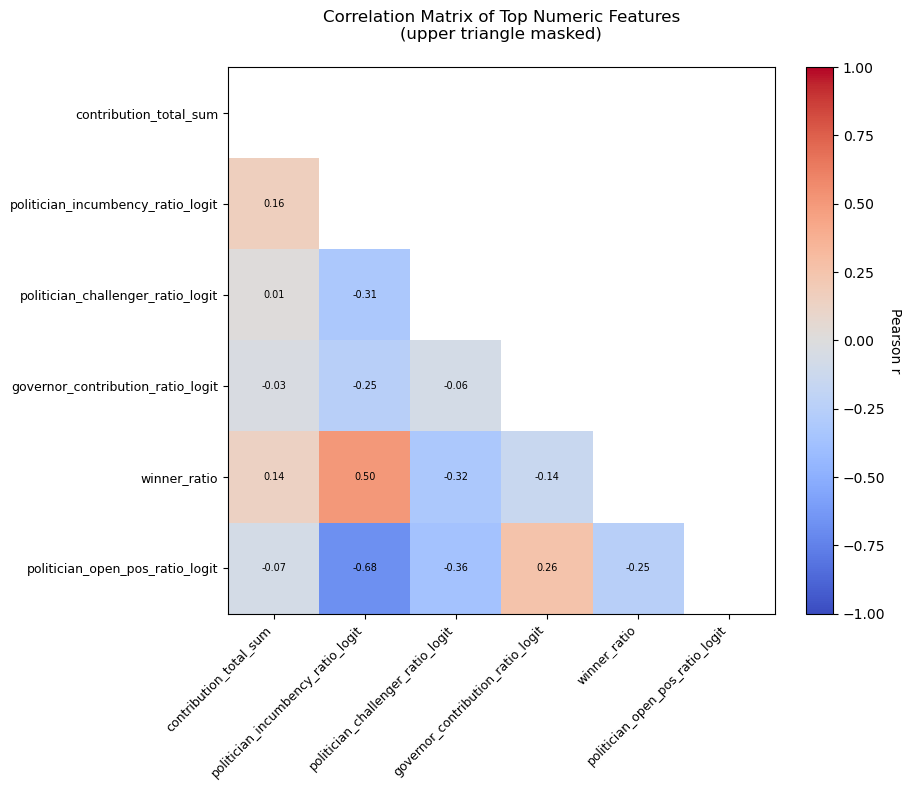

In [1114]:
import matplotlib.pyplot as plt


# 2) Compute the correlation matrix
corr = train[train_num_vars].corr()

# 3) Build a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4) Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap, masking out the upper triangle
cmap = plt.get_cmap('coolwarm')
im = ax.imshow(np.ma.masked_where(mask, corr), 
               cmap=cmap, vmin=-1, vmax=1)

# Set tick labels
ax.set_xticks(np.arange(len(train_num_vars)))
ax.set_yticks(np.arange(len(train_num_vars)))
ax.set_xticklabels(train_num_vars, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(train_num_vars, fontsize=9)

# Annotate each cell in the lower triangle with its correlation value
for i in range(len(train_num_vars)):
    for j in range(len(train_num_vars)):
        if not mask[i, j]:  # only annotate lower triangle
            val = corr.iloc[i, j]
            ax.text(j, i, f"{val:.2f}", ha='center', va='center',
                    color='black', fontsize=7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson r", rotation=270, labelpad=12)

ax.set_title("Correlation Matrix of Top Numeric Features\n(upper triangle masked)", pad=20)
plt.tight_layout()
plt.show()

RF trees: 100%|██████████| 1000/1000 [01:06<00:00, 14.93it/s]


Training RMSE: 0.1012
Validation RMSE: 0.1058


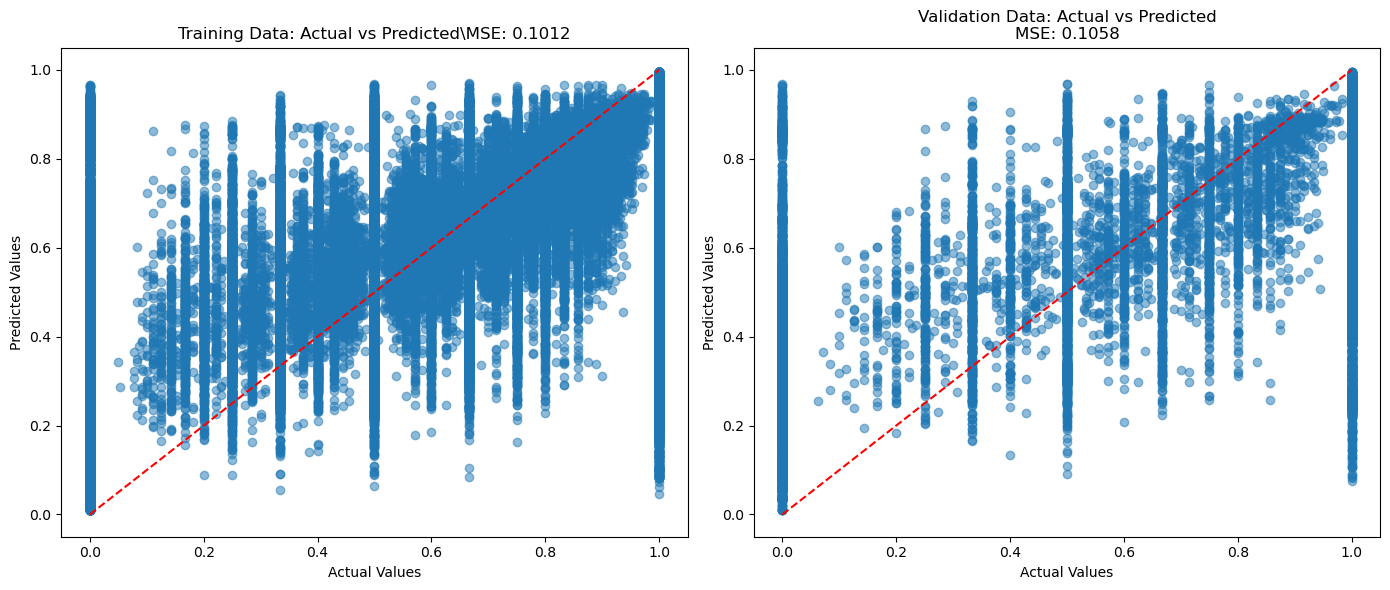

In [1126]:
# ------------------------------------------------------------------
# 8. Train/test/validation split for modeling
# ------------------------------------------------------------------
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ✅ Step 1: Define your features (X) and target (y)
X = train.drop(columns=['winner_ratio'])  # replace with your actual target column name
y= train['winner_ratio']

# ✅ Step 2: Train-validation split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

# ------------------------------------------------------------------
# 9. Train Random Forest model directly (no hyperparameter tuning)
# ------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# Create and train a Random Forest model with default parameters
from tqdm.auto import tqdm
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators      = 1,
    warm_start        = True,
    random_state      = 42,
    n_jobs            = -1,
    max_depth         = 12,
    min_samples_split = 5,
    min_samples_leaf  = 3,
    max_features      = "sqrt"
)

pbar = tqdm(total=1000, desc="RF trees")
for i in range(1, 1001):
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)
    pbar.update(1)
pbar.close()

# Make predictions on train and validation sets
train_pred = rf.predict(X_train)
val_pred = rf.predict(X_val)

# Calculate RMSE for both sets
train_rmse = metrics.mean_squared_error(y_train, train_pred)
val_rmse = metrics.mean_squared_error(y_val, val_pred)

print(f"Training RMSE: {train_rmse:,.4f}")
print(f"Validation RMSE: {val_rmse:,.4f}")

# ------------------------------------------------------------------
# Plot actual vs predicted values for train and validation data
# ------------------------------------------------------------------
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Training data plot
ax1.scatter(y_train, train_pred, alpha=0.5)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title(f'Training Data: Actual vs Predicted\MSE: {train_rmse:.4f}')

# Validation data plot
ax2.scatter(y_val, val_pred, alpha=0.5)
ax2.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title(f'Validation Data: Actual vs Predicted\nMSE: {val_rmse:.4f}')

plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

In [1124]:
from sklearn.experimental import enable_halving_search_cv  # noqa F401
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble         import RandomForestRegressor
from sklearn.metrics          import mean_squared_error
import matplotlib.pyplot      as plt

search = HalvingGridSearchCV(
    estimator   = RandomForestRegressor(random_state=42),
    param_grid  = {
        'n_estimators':      [500, 1000, 1500],
        'max_depth':         [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf':  [1, 2, 4],
        'max_features':      ['sqrt','log2'],
    },
    factor    = 3,
    cv        = 3,
    scoring   = 'neg_mean_squared_error',
    verbose   = 2,    # shows the halving progress
    n_jobs    = -1,
)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV MSE:", -search.best_score_)



n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1539
max_resources_: 124671
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 1539
Fitting 3 folds for each of 162 candidates, totalling 486 fits


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=Non

Train  MSE: 0.1044
Val    MSE: 0.1080


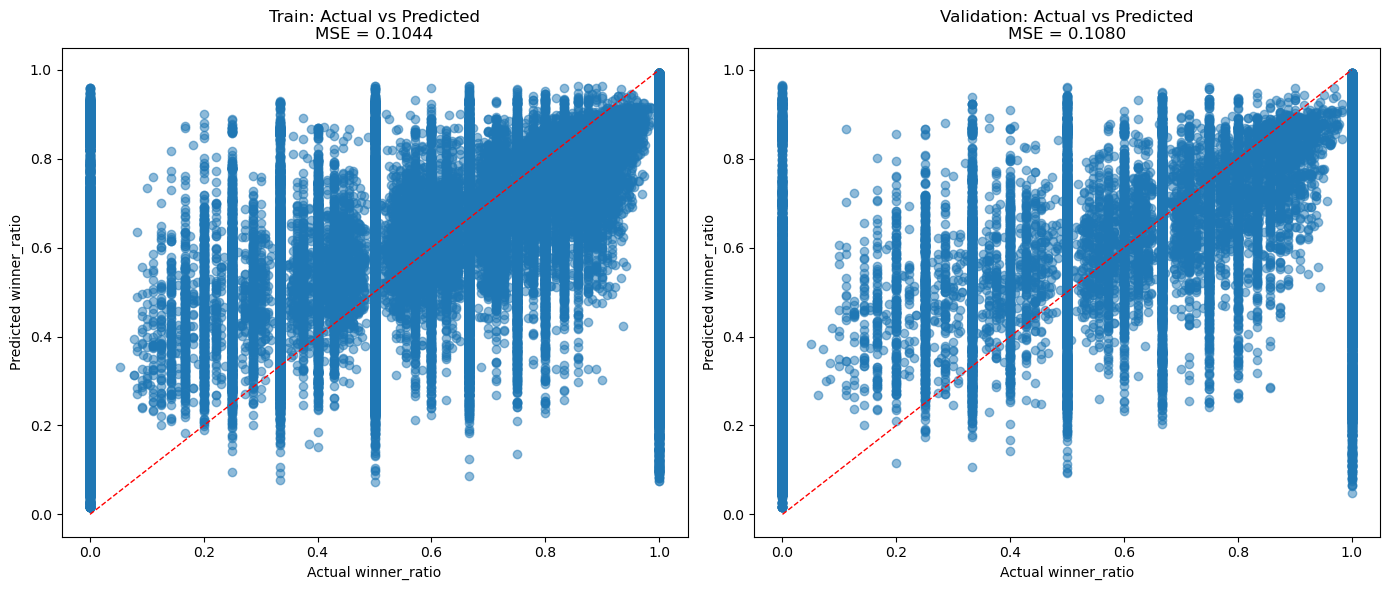

In [1125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ─── 1) Rebuild the model with your best parameters ──────────────────────
best_params = {
    'n_estimators':      1000,
    'max_depth':         10,
    'min_samples_split': 10,
    'min_samples_leaf':  2,
    'max_features':      'sqrt'
}

rf_best = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    **best_params
)

# ─── 2) Fit on the full training set ────────────────────────────────────
rf_best.fit(X_train, y_train)

# ─── 3) Predict on train & validation ─────────────────────────────────
train_pred = rf_best.predict(X_train)
val_pred   = rf_best.predict(X_val)

# ─── 4) Compute MSE ─────────────────────────────────────────────────────
mse_train = mean_squared_error(y_train, train_pred)
mse_val   = mean_squared_error(y_val,   val_pred)

print(f"Train  MSE: {mse_train:.4f}")
print(f"Val    MSE: {mse_val:.4f}")

# ─── 5) Plot Actual vs Predicted ───────────────────────────────────────
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Training set
ax1.scatter(y_train, train_pred, alpha=0.5)
ax1.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', linewidth=1)
ax1.set_title(f"Train: Actual vs Predicted\nMSE = {mse_train:.4f}")
ax1.set_xlabel("Actual winner_ratio")
ax1.set_ylabel("Predicted winner_ratio")

# Validation set
ax2.scatter(y_val, val_pred, alpha=0.5)
ax2.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         'r--', linewidth=1)
ax2.set_title(f"Validation: Actual vs Predicted\nMSE = {mse_val:.4f}")
ax2.set_xlabel("Actual winner_ratio")
ax2.set_ylabel("Predicted winner_ratio")

plt.tight_layout()
plt.show()


In [1122]:
# ✅ Necessary imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# ✅ Define the grid of hyperparameters to search
param_grid = {
    # number of trees
    'n_estimators': [500, 1000, 1500],

    # tree depth: None = expand until leaves are pure (or other stopping criteria),
    # plus a few fixed depths
    'max_depth': [None, 10, 20],

    # minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10],

    # minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 2, 4],

    # number of features to consider at each split:
    # 'sqrt' is the default for regression, but you can also try log2 or a fraction
    'max_features': ['sqrt', 'log2']

}

from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.ensemble          import RandomForestRegressor
from sklearn.metrics           import mean_squared_error
from tqdm.auto                 import tqdm
import matplotlib.pyplot       as plt

# 1) turn your param_grid into a list of dicts
param_list = list(ParameterGrid(param_grid))

best_score = float("inf")
best_params = None

# 2) wrap the loop in tqdm
for params in tqdm(param_list, desc="Grid search"):
    # a fresh RF for each combo
    model = RandomForestRegressor(
        random_state=42,
        n_jobs=-1,
        **params
    )
    # 3‑fold CV on neg MSE
    scores = cross_val_score(
        model, X_train, y_train,
        cv=3,
        scoring="neg_mean_squared_error",
        n_jobs=-1
    )
    mean_mse = -scores.mean()
    
    # track the best
    if mean_mse < best_score:
        best_score  = mean_mse
        best_params = params

# 3) report best
print("\nBest params:", best_params)
print("Best CV MSE :", best_score)

# 4) refit & evaluate train/val
rf_final = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    **best_params
).fit(X_train, y_train)

train_pred = rf_final.predict(X_train)
val_pred   = rf_final.predict(X_val)

train_mse = mean_squared_error(y_train, train_pred)
val_mse   = mean_squared_error(y_val,   val_pred)

print(f"\nTrain MSE: {train_mse:.4f}")
print(f"Val   MSE: {val_mse:.4f}")

# 5) plot actual vs pred
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.scatter(y_train, train_pred, alpha=0.4)
ax1.plot([0,1],[0,1],"r--")
ax1.set(title=f"Train (MSE={train_mse:.4f})", xlabel="Actual", ylabel="Predicted")

ax2.scatter(y_val, val_pred, alpha=0.4)
ax2.plot([0,1],[0,1],"r--")
ax2.set(title=f"Val   (MSE={val_mse:.4f})", xlabel="Actual", ylabel="Predicted")

plt.tight_layout()
plt.show()


Grid search:   4%|▍         | 7/162 [05:28<2:01:15, 46.94s/it]


KeyboardInterrupt: 

Train MSE: 0.06028522318995205
Validation MSE: 0.10006120020044282


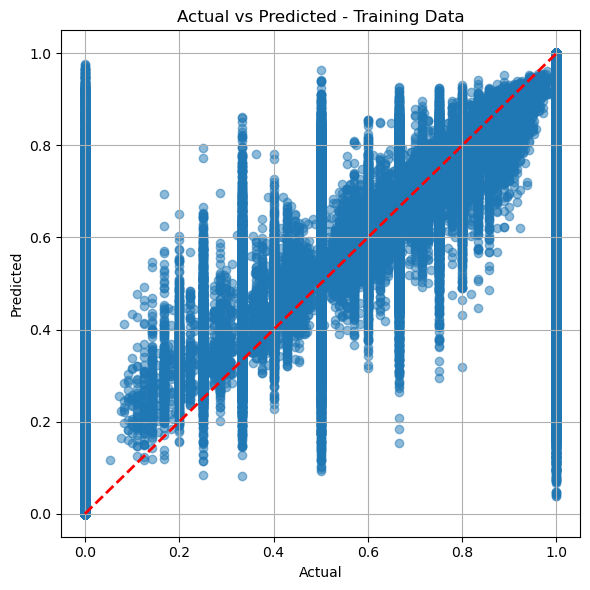

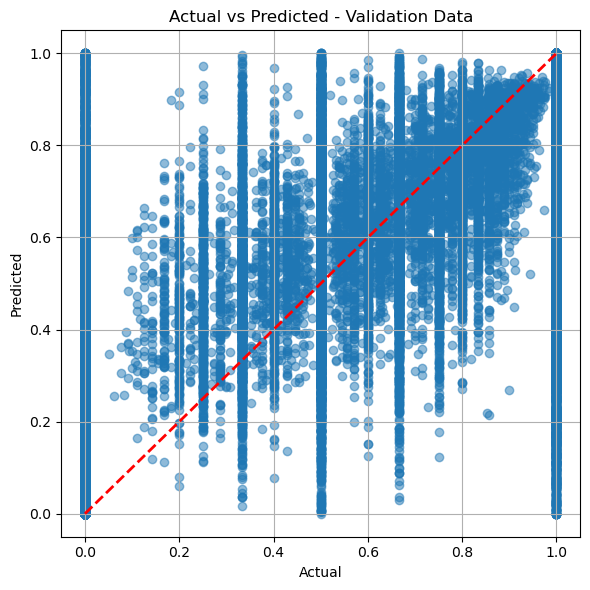

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# ✅ Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(training_data, train_y, test_size=0.25, random_state=42)

# ✅ Initialize Random Forest with fixed parameters
rf_model = RandomForestRegressor(
    n_estimators=45,
    max_depth=25,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# ✅ Fit model
rf_model.fit(X_train, y_train)

# ✅ Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# ✅ Evaluation
print("Train MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", metrics.mean_squared_error(y_val, y_val_pred))

# ✅ Plot actual vs predicted
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Data")


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

# ✅ Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(training_data, train_y, test_size=0.25, random_state=42)

# ✅ Hyperparameter grid
param_grid = {
    'n_estimators': range(1, 50, 5),
    'max_depth': range(1, 30, 5),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# ✅ Model and GridSearch
model3 = RandomForestRegressor(random_state=42)
rf_optimized = GridSearchCV(
    estimator=model3,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

# ✅ Fit on training data
rf_optimized.fit(X_train, y_train)

# ✅ Predict
y_train_pred = rf_optimized.predict(X_train)
y_val_pred = rf_optimized.predict(X_val)

# ✅ Evaluate
print("Train MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", metrics.mean_squared_error(y_val, y_val_pred))

# ✅ Plot actual vs. predicted
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Data")


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


KeyboardInterrupt: 